In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import copy 
dn=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', index_col=None,
                            parse_dates=['reviews.date'], infer_datetime_format=True)

In [ ]:
dn.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02 00:00:00+00:00,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31 00:00:00+00:00,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06 00:00:00+00:00,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28 00:00:00+00:00,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22 00:00:00+00:00,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
df=copy.deepcopy(dn)
df=df[["id",	"dateAdded"	,"dateUpdated",	"name", "primaryCategories","manufacturer", "reviews.date" , "reviews.didPurchase",	"reviews.doRecommend",	"reviews.id",	"reviews.numHelpful",	"reviews.rating",
       "reviews.text",	"reviews.title"]]
#, "manufacturer", "reviews.didPurchase",	"reviews.doRecommend",	"reviews.id",	"reviews.numHelpful",	"reviews.rating", "reviews.text",	"reviews.title"

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np

In [ ]:
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (20, 8)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [ ]:
#df=df.groupby("primaryCategories")
df = df.rename(columns = {"reviews.date":"date", "reviews.rating":"rating"})
df

,id,dateAdded,dateUpdated,name,primaryCategories,manufacturer,date,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,rating,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,AmazonBasics,2017-03-02 00:00:00+00:00,NaN,NaN,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,AmazonBasics,2016-08-31 00:00:00+00:00,NaN,NaN,NaN,NaN,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,AmazonBasics,2016-12-06 00:00:00+00:00,NaN,NaN,NaN,NaN,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,AmazonBasics,2016-03-28 00:00:00+00:00,NaN,NaN,NaN,NaN,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Health & Beauty,AmazonBasics,2017-04-22 00:00:00+00:00,NaN,NaN,NaN,NaN,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Electronics,Amazon,2016-12-07 00:00:00+00:00,NaN,True,NaN,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Electronics,Amazon,2017-01-20 00:00:00+00:00,NaN,True,NaN,0.0,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Electronics,Amazon,2017-01-30 00:00:00+00:00,NaN,True,NaN,0.0,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Electronics,Amazon,2017-02-17 00:00:00+00:00,NaN,True,NaN,0.0,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!


#The number of each rating value per year 

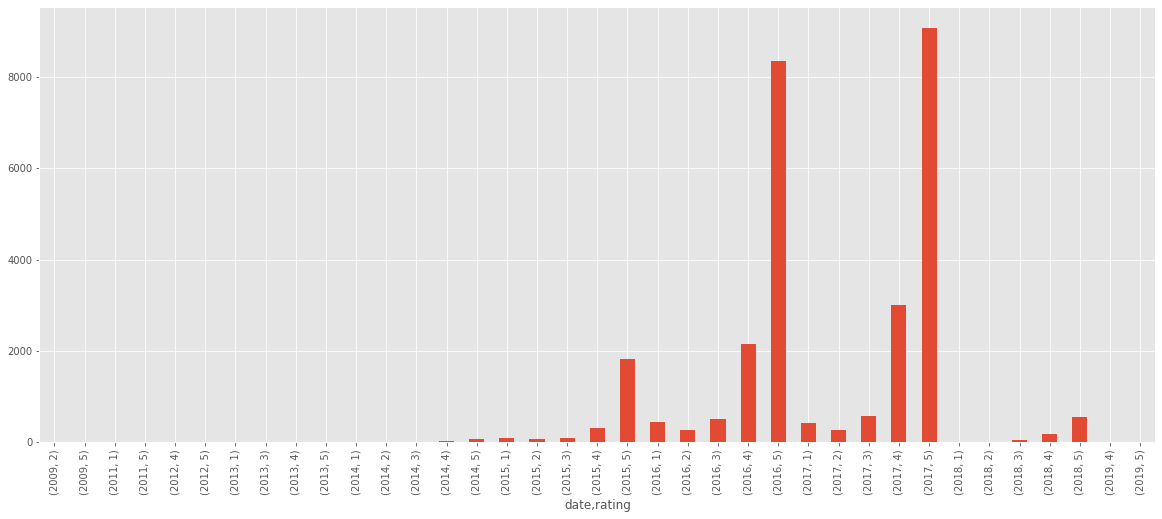

In [ ]:
df[["date","rating"]].groupby([df.date.dt.year, df.rating]).size().plot(kind="bar")

# The number of each rating value per PrimaryCategories

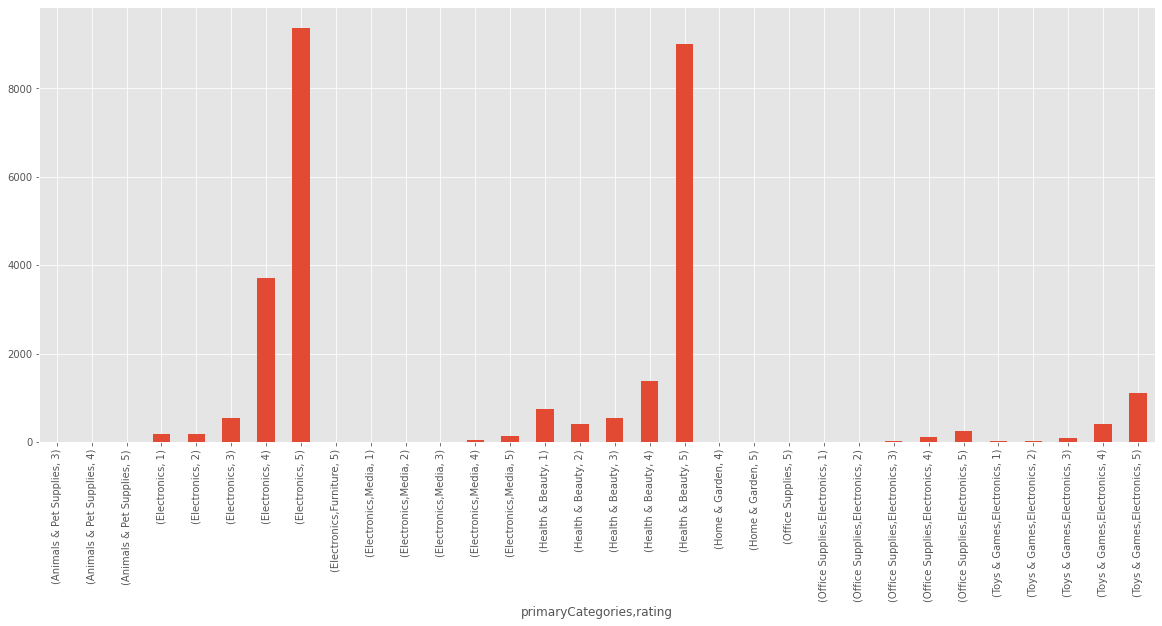

In [ ]:
df[["primaryCategories","rating"]].groupby([df.primaryCategories, df.rating]).size().plot(kind="bar")

#The overall rating for each product

In [ ]:
aa=df[["id","rating"]].groupby([df.id, df.rating]).size().unstack(level=1).fillna(0)
aa

rating,1,2,3,4,5
id,,,,,
AV-ETMhgYSSHbkXwpNb9,0.0,0.0,0.0,1.0,3.0
AV-EVZITKZqtpbFMSoqc,0.0,1.0,0.0,6.0,15.0
AV2ElNnuvKc47QAVouhY,0.0,0.0,0.0,1.0,0.0
AVpe5Q3sLJeJML43xt5X,0.0,0.0,0.0,0.0,1.0
AVpe6nyKLJeJML43yOe2,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...
AWMjXUGdHh53nbDRJ9LA,0.0,0.0,0.0,2.0,1.0
AWP6zKOtIwln0LfXnf2p,0.0,0.0,1.0,2.0,4.0
AWYAV-i9Iwln0LfXqrUq,0.0,0.0,0.0,1.0,1.0


In [ ]:
bb=copy.deepcopy(aa)
for i in aa.columns:
  bb[i]=bb[i]*i
bb

rating,1,2,3,4,5
id,,,,,
AV-ETMhgYSSHbkXwpNb9,0.0,0.0,0.0,4.0,15.0
AV-EVZITKZqtpbFMSoqc,0.0,2.0,0.0,24.0,75.0
AV2ElNnuvKc47QAVouhY,0.0,0.0,0.0,4.0,0.0
AVpe5Q3sLJeJML43xt5X,0.0,0.0,0.0,0.0,5.0
AVpe6nyKLJeJML43yOe2,0.0,0.0,9.0,0.0,15.0
...,...,...,...,...,...
AWMjXUGdHh53nbDRJ9LA,0.0,0.0,0.0,8.0,5.0
AWP6zKOtIwln0LfXnf2p,0.0,0.0,3.0,8.0,20.0
AWYAV-i9Iwln0LfXqrUq,0.0,0.0,0.0,4.0,5.0


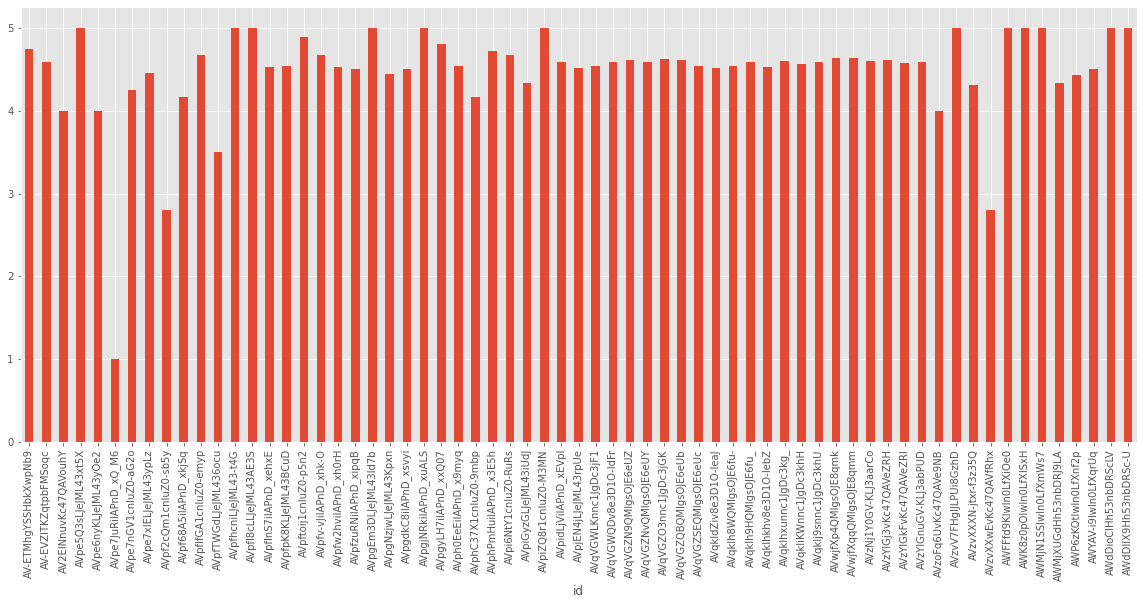

In [ ]:
(bb.sum(axis=1)/aa.sum(axis=1)).plot(kind="bar")

#The number of Recommendation given for each Categorie products

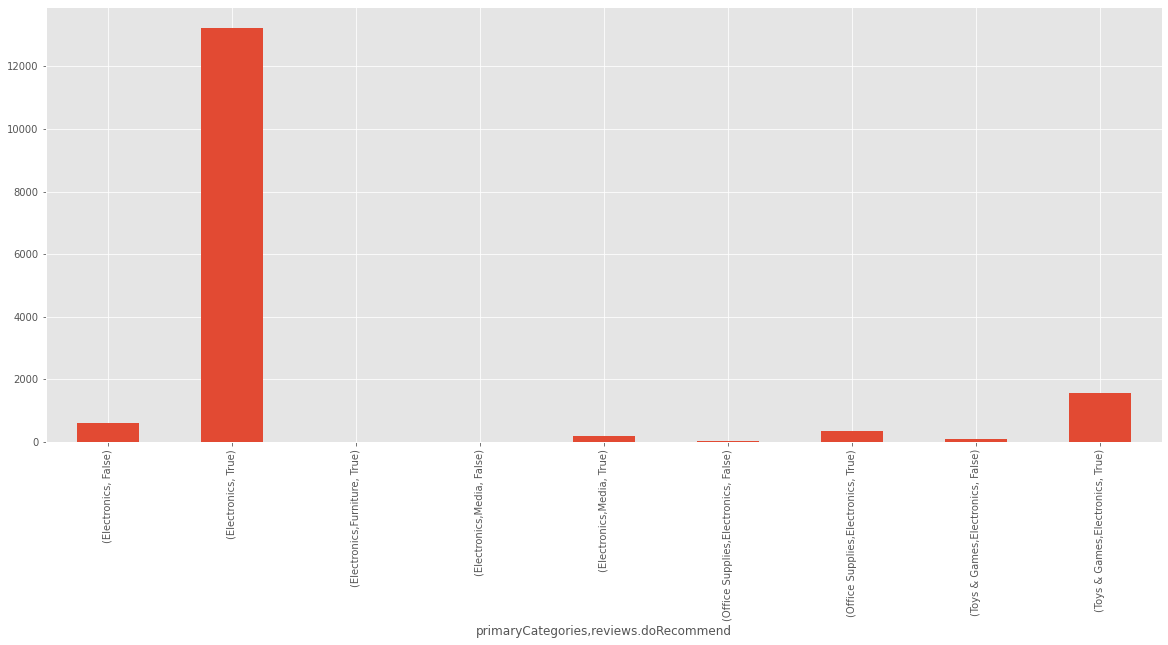

In [ ]:
df.groupby(["primaryCategories","reviews.doRecommend"]).size().plot(kind="bar")